In [5]:
import rdflib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from graph import *
from rdf2vec import RDF2VecTransformer
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
import networkx as nx
from LCS import start_lcs, new_lcs

In [6]:
print(end='Loading data... ', flush=True)
g = rdflib.Graph()
g.parse('data/new_limit_500k.nt', format="nt")
print('OK')

# Extract all database drugs' URI
all_drugs_file = pd.read_csv('data/all_drugs.tsv', sep='\t')
all_drugs = [rdflib.URIRef(x) for x in all_drugs_file['drug']]

# Define relevant predicates
# TODO: Wrong -> predicates excluded!!!
predicates = pd.read_csv('data/bad_predicates.tsv', sep='\t')
predicates = [rdflib.URIRef(x) for x in predicates['predicate']]


Loading data... OK


In [7]:
kg = rdflib_to_kg(g, label_predicates=predicates)

In [8]:
#kg = rdflib_to_kg(g, label_predicates=[rdflib.URIRef("http://bio2rdf.org/drugbank_vocabulary:calculated-properties"), rdflib.URIRef("http://purl.org/dc/terms/title")])

#a = extract_instance(kg, "http://bio2rdf.org/drugbank:DB00114")

In [9]:
# Extract graph
#kg = rdflib_to_kg(g, label_predicates=predicates)
i = 1
j = 1
graphs = []
for drug in all_drugs:
    try:
        graphs.append(extract_instance(kg, drug))
        print(i)
        print(drug)
        i += 1
    except Exception as e:
        j += 1
        
    if i == 20:
        break
        
print('ok:' + str(i))
print('failed:' + str(j))

1
http://bio2rdf.org/drugbank:DB00023
2
http://bio2rdf.org/drugbank:DB00783
3
http://bio2rdf.org/drugbank:DB00984
4
http://bio2rdf.org/drugbank:DB08416
5
http://bio2rdf.org/drugbank:DB08418
6
http://bio2rdf.org/drugbank:DB08419
7
http://bio2rdf.org/drugbank:DB08420
8
http://bio2rdf.org/drugbank:DB08421
9
http://bio2rdf.org/drugbank:DB08422
10
http://bio2rdf.org/drugbank:DB08423
11
http://bio2rdf.org/drugbank:DB08424
12
http://bio2rdf.org/drugbank:DB08425
13
http://bio2rdf.org/drugbank:DB08426
14
http://bio2rdf.org/drugbank:DB08427
15
http://bio2rdf.org/drugbank:DB08428
16
http://bio2rdf.org/drugbank:DB08429
17
http://bio2rdf.org/drugbank:DB08430
18
http://bio2rdf.org/drugbank:DB08431
19
http://bio2rdf.org/drugbank:DB08432
ok:20
failed:7258


In [10]:
#for g in graphs:
#    g.visualise()

In [11]:
g1 = graphs[4]
g2 = graphs[5]
n1 = "http://bio2rdf.org/drugbank:DB08418"
n2 = "http://bio2rdf.org/drugbank:DB08419"
x_Tx = new_lcs(n1, n2, g1, g2, 2)

/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_1574280989.772599
/:x_157428

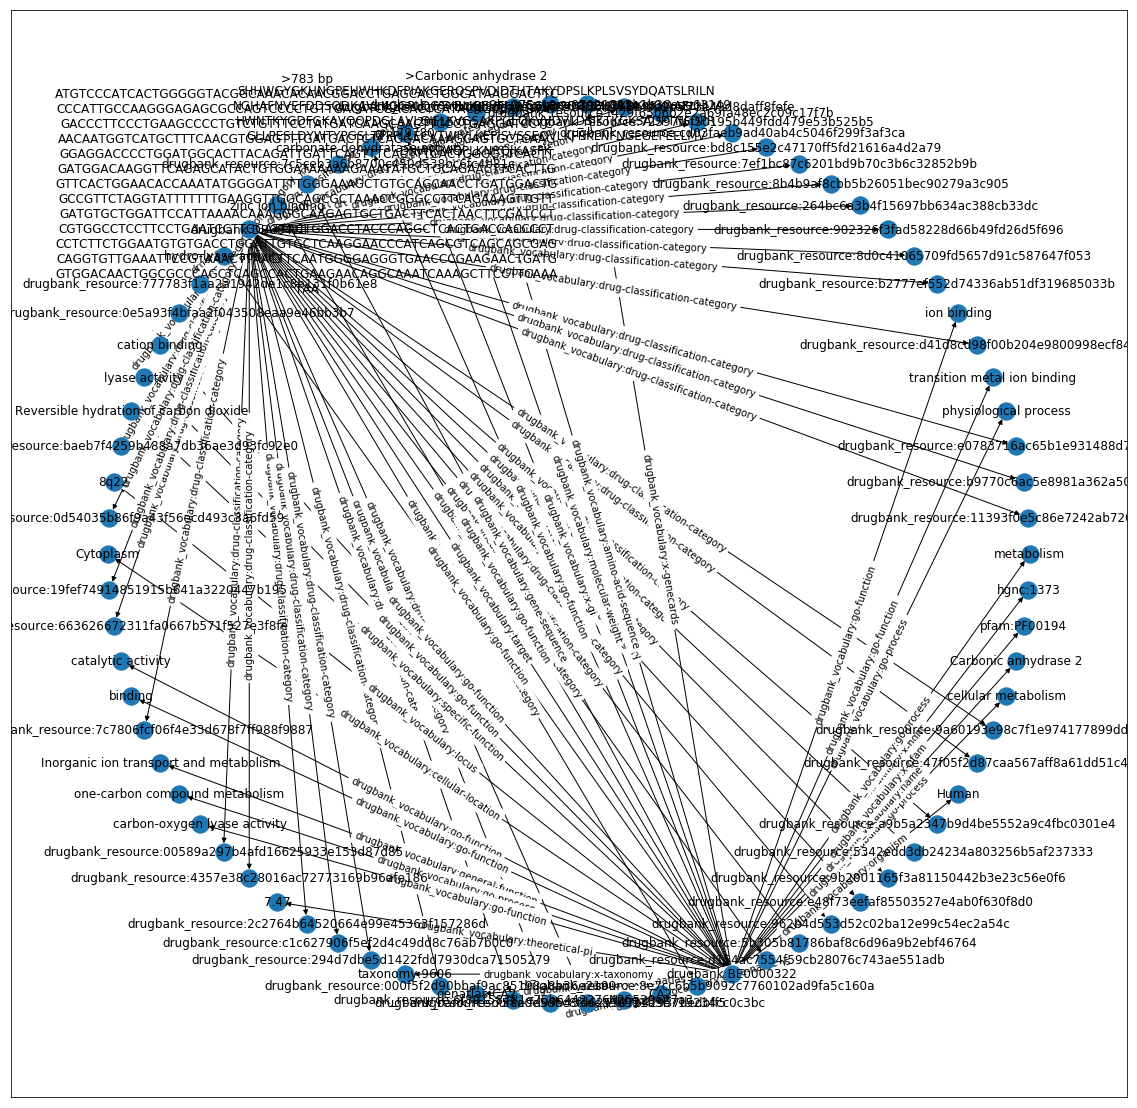

In [13]:
g1.visualise()

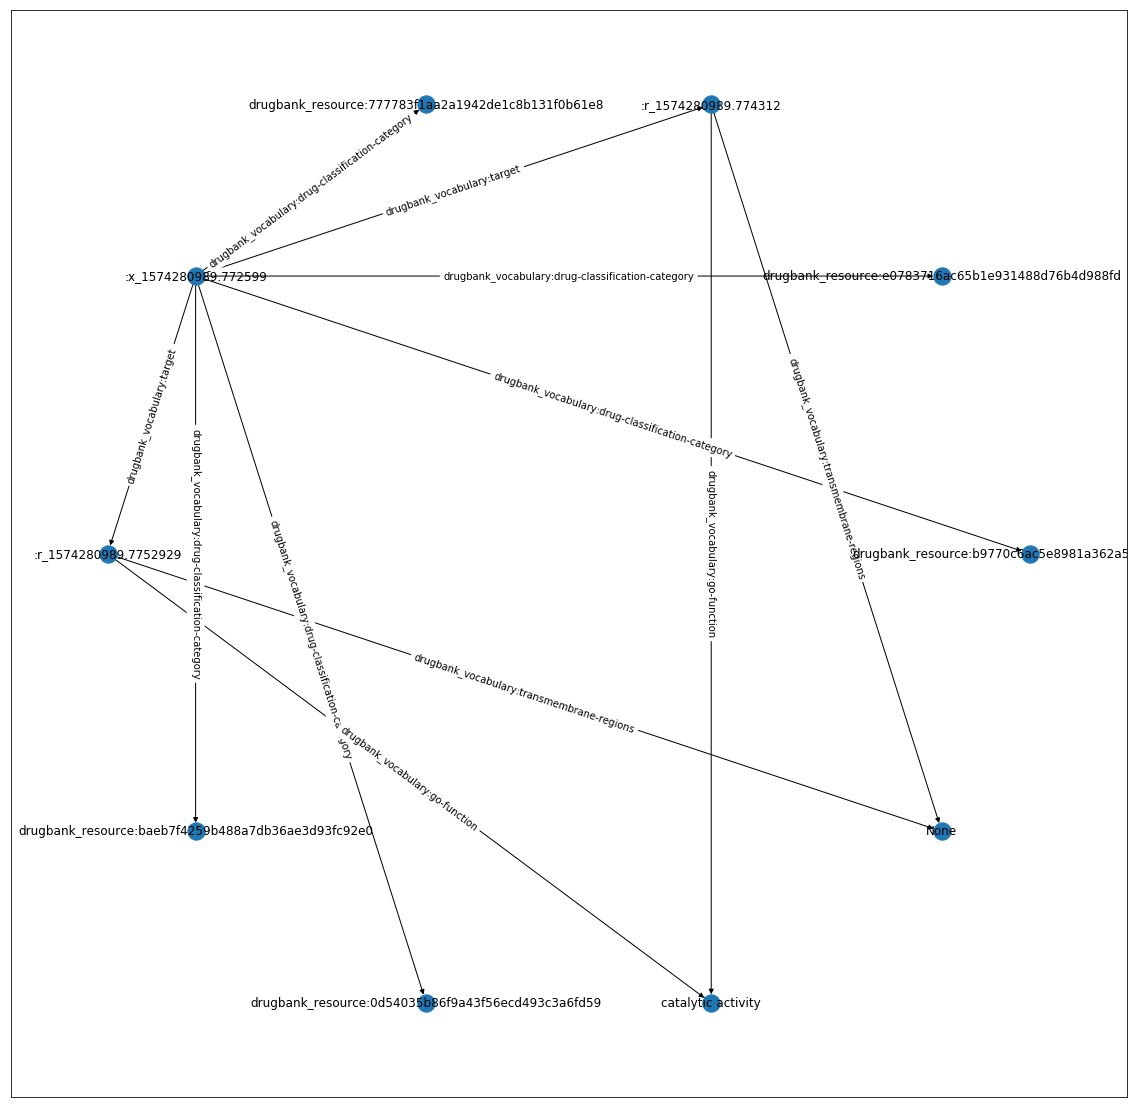

In [12]:
x_Tx.visualise()

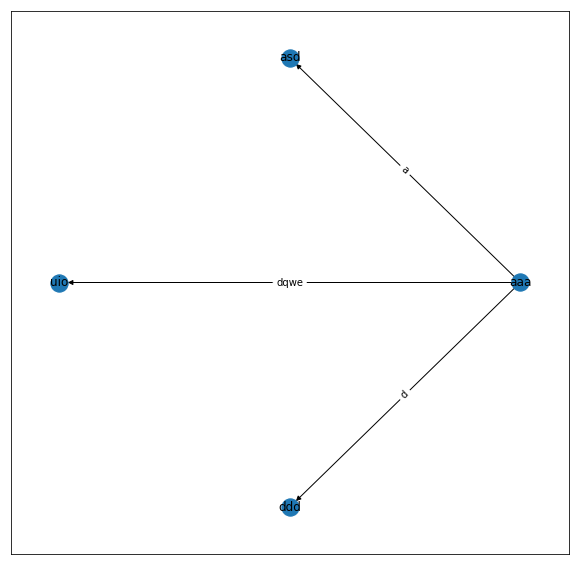

In [2]:
g1 = KnowledgeGraph()
a = Vertex('a/aaa')
g1.add_vertex(a)
b = Vertex('a/a', predicate=True)
g1.add_vertex(b)
c = Vertex('a/asd')
g1.add_vertex(c)


bb = Vertex('a/d', predicate=True)
g1.add_vertex(bb)
cc = Vertex('a/ddd')
g1.add_vertex(c)
gg = Vertex('a/dqwe', predicate=True)
g1.add_vertex(gg)
hh = Vertex('a/uio')
g1.add_vertex(hh)

g1.add_edge(a, b)
g1.add_edge(a, gg)
g1.add_edge(gg, hh)
g1.add_edge(b, c)


g1.add_edge(a, bb)
g1.add_edge(bb, cc)



g1.visualise()

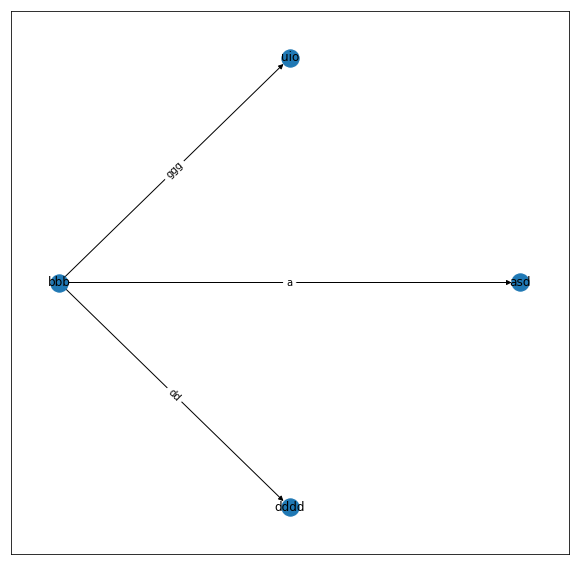

In [3]:
g2 = KnowledgeGraph()
a = Vertex('a/bbb')
g2.add_vertex(a)
b = Vertex('a/a', predicate=True)
g2.add_vertex(b)
c = Vertex('a/asd')
g2.add_vertex(c)


bb = Vertex('a/dd', predicate=True)
g2.add_vertex(bb)
cc = Vertex('a/dddd')
g2.add_vertex(c)
gg = Vertex('a/ggg', predicate=True)
g2.add_vertex(gg)
hh = Vertex('a/uio')
g2.add_vertex(hh)

g2.add_edge(a, b)
g2.add_edge(a, gg)
g2.add_edge(gg, hh)
g2.add_edge(b, c)


g2.add_edge(a, bb)
g2.add_edge(bb, cc)



g2.visualise()

In [4]:
n1 = "a/aaa"
n2 = "a/bbb"
x_Tx = new_lcs(n1, n2, g1, g2, 2)

/:x_1574280036.00273
/:x_1574280036.00273
/:x_1574280036.00273
/:x_1574280036.00273
/:x_1574280036.00273
/:x_1574280036.00273
a/a
/:r_1574280036.0029938
/:r_1574280036.003029
/:x_1574280036.003217
/:x_1574280036.0032609
a/a
removing
removing


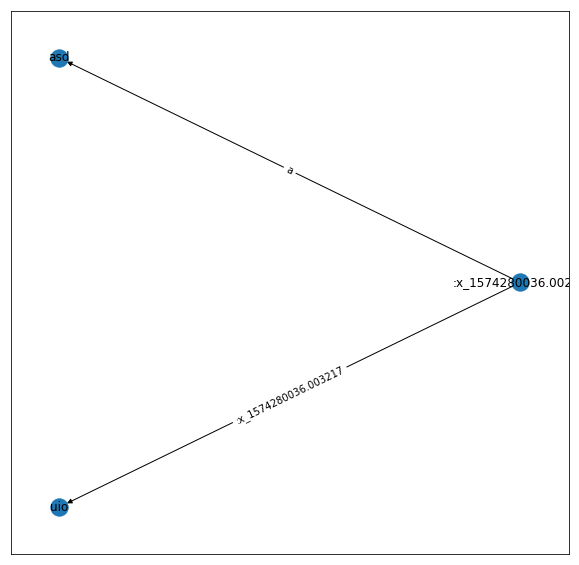

In [5]:
x_Tx.visualise()

In [ ]:
# Embeddings
transformer = RDF2VecTransformer(_type='walk', walks_per_graph=500)
embeddings = transformer.fit_transform(graphs)

kmeans = KMeans(n_clusters=7)
k = kmeans.fit(embeddings)
y_kmeans = kmeans.predict(embeddings)

In [ ]:
# PCA
pca = PCA(n_components=2)
pca = pca.fit_transform(embeddings)

principalDf = pd.DataFrame(data=pca, columns=['pc1', 'pc2'])

In [ ]:
kmeans2 = KMeans(n_clusters=7)
kmeans2.fit(principalDf)

In [ ]:
print(kmeans2.cluster_centers_)

In [ ]:
# rappresentazione grafica
plt.scatter(principalDf['pc1'], principalDf['pc2'], c=y_kmeans, s=50, cmap='viridis')

centers = np.asarray(kmeans2.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)

In [ ]:
# PCA
pca = PCA(n_components=3)
pca = pca.fit_transform(embeddings)

principalDf = pd.DataFrame(data=pca, columns=['pc1', 'pc2', 'pc3'])

kmeans2 = KMeans(n_clusters=7)
kmeans2.fit(principalDf)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot

In [ ]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(principalDf['pc1'], principalDf['pc2'], principalDf['pc3'], c=y_kmeans, s=50, cmap='viridis')

centers = np.asarray(kmeans2.cluster_centers_)
ax.scatter(centers[:,0], centers[:,1], centers[:,2], c='black', s=200, alpha=0.5)